In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [197]:
data = pd.read_excel("/content/customer_churn_large_dataset.xlsx")
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [198]:
data.shape

(100000, 9)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [200]:
data.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [202]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [203]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [204]:
data[data.duplicated()].shape

(0, 9)

In [205]:
data.Churn.unique()

array([0, 1])

In [206]:
data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

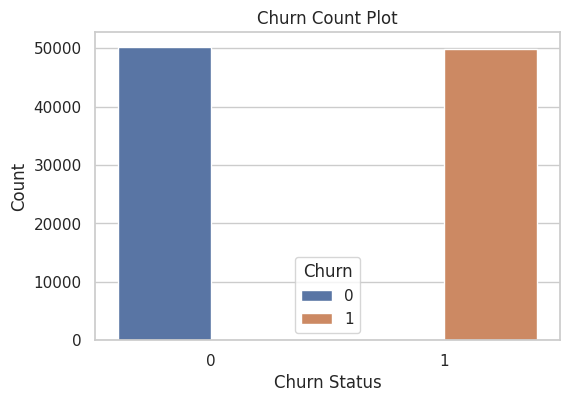

In [207]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn', hue='Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Count Plot')
plt.show()

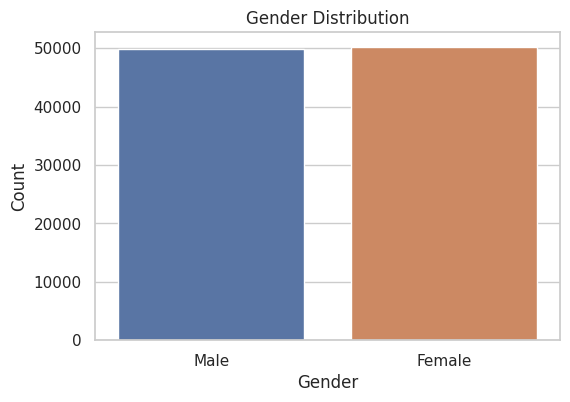

In [208]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [209]:
data['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

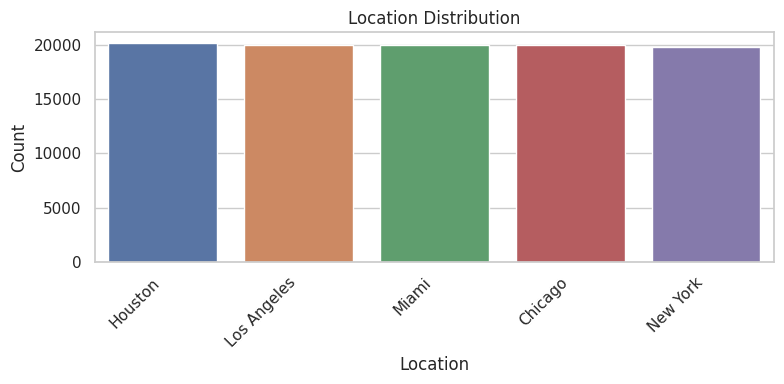

In [210]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Location', order=data['Location'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')
plt.tight_layout()
plt.show()

In [211]:
data.drop(columns=['CustomerID','Name'], inplace=True)
data.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [212]:
data['Gender']=(data['Gender']=='Male').astype(int)
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,Los Angeles,17,73.36,236,0
1,62,0,New York,1,48.76,172,0
2,24,0,Los Angeles,5,85.47,460,0
3,36,0,Miami,3,97.94,297,1
4,46,0,Miami,19,58.14,266,0


In [213]:
Unique_data= data['Location'].unique()
Unique_data

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [214]:
df=pd.get_dummies(data,columns=['Location']).astype(int)
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73,236,0,0,0,1,0,0
1,62,0,1,48,172,0,0,0,0,0,1
2,24,0,5,85,460,0,0,0,1,0,0
3,36,0,3,97,297,1,0,0,0,1,0
4,46,0,19,58,266,0,0,0,0,1,0


In [215]:
df=df.rename({'Location_Los Angeles': 'Location_Los_Angeles'}, axis=1)
df=df.rename({'Location_New York': 'Location_New_York'}, axis=1)

In [216]:
df.columns

Index(['Age', 'Gender', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn', 'Location_Chicago', 'Location_Houston',
       'Location_Los_Angeles', 'Location_Miami', 'Location_New_York'],
      dtype='object')

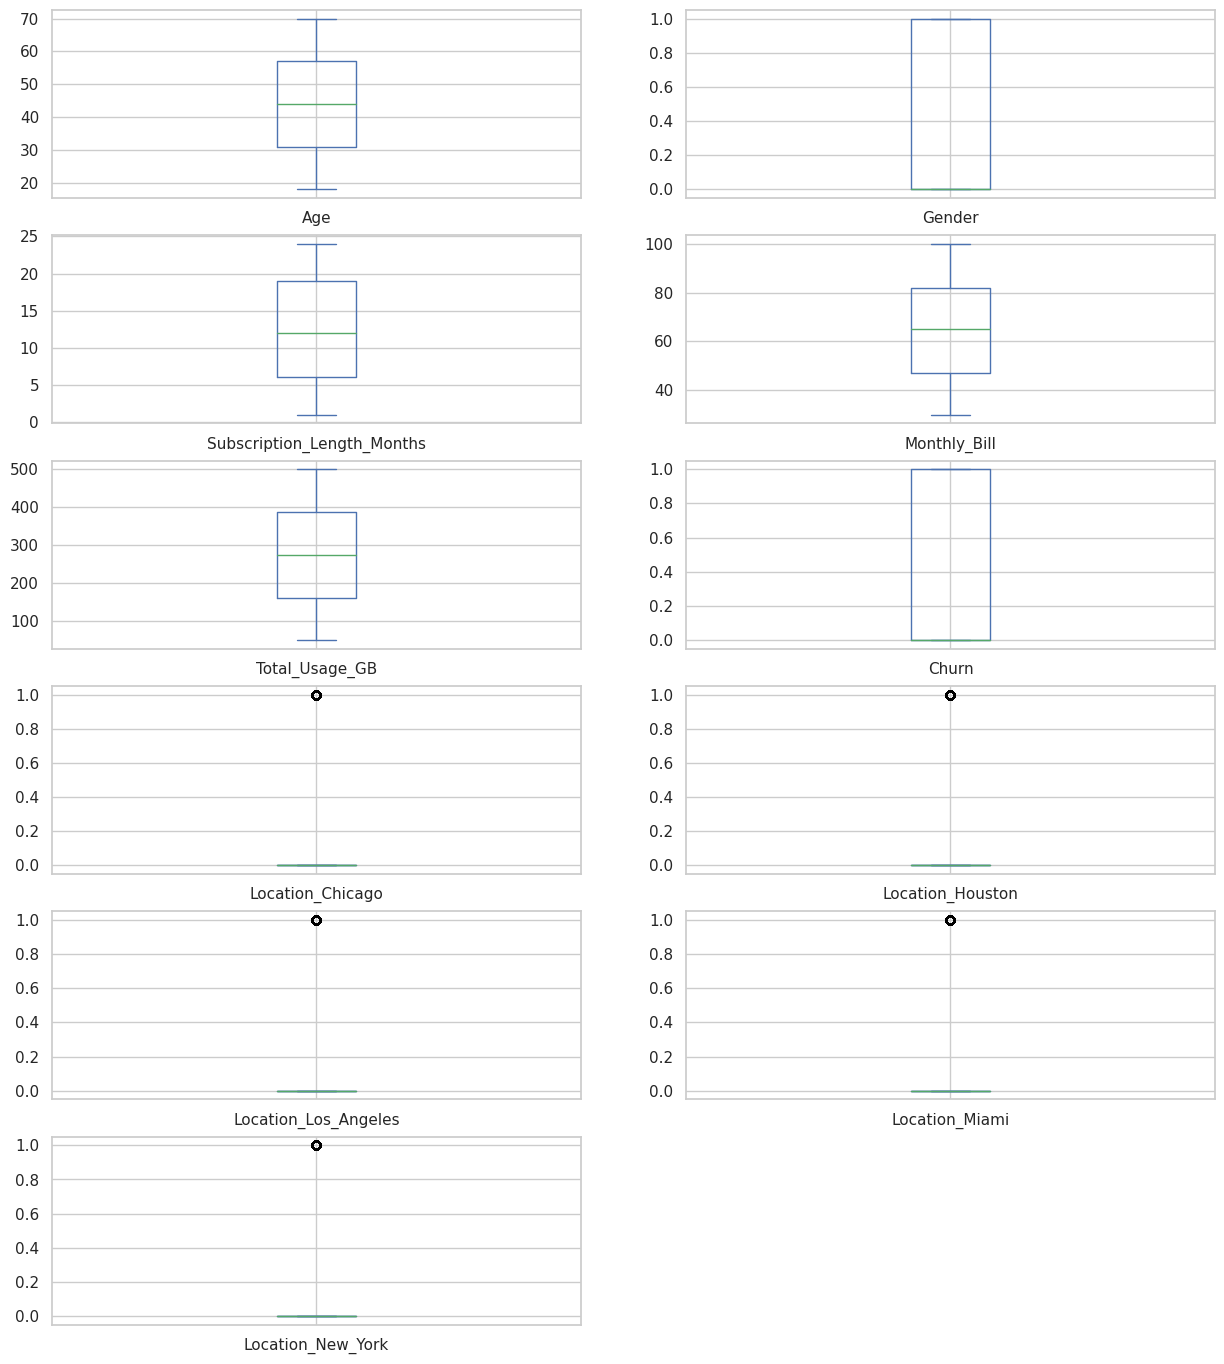

In [217]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

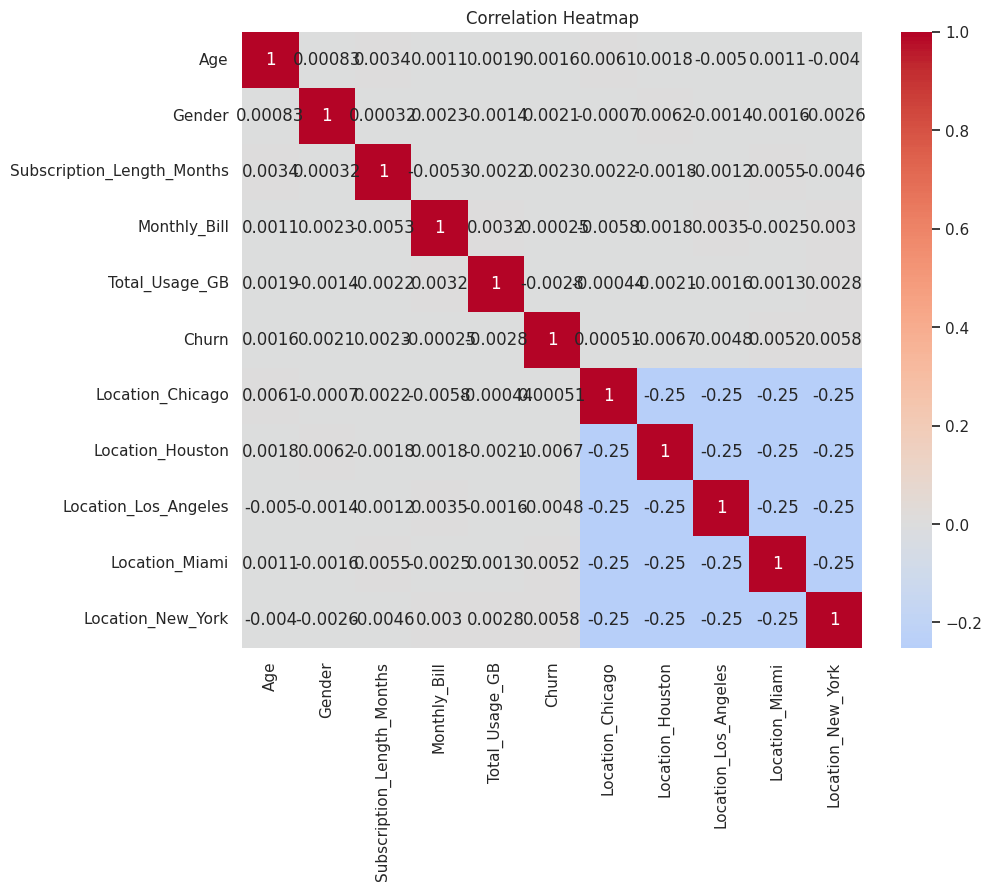

In [218]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Age                         100000 non-null  int64
 1   Gender                      100000 non-null  int64
 2   Subscription_Length_Months  100000 non-null  int64
 3   Monthly_Bill                100000 non-null  int64
 4   Total_Usage_GB              100000 non-null  int64
 5   Churn                       100000 non-null  int64
 6   Location_Chicago            100000 non-null  int64
 7   Location_Houston            100000 non-null  int64
 8   Location_Los_Angeles        100000 non-null  int64
 9   Location_Miami              100000 non-null  int64
 10  Location_New_York           100000 non-null  int64
dtypes: int64(11)
memory usage: 8.4 MB


In [220]:
X = df.drop('Churn',axis = 1)
y = df['Churn']

In [221]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [222]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [223]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [224]:
X_train

array([[ 0.06531243,  1.00580791,  1.23122026, ..., -0.49944024,
        -0.50247081, -0.4993236 ],
       [ 1.57030609, -0.99422563, -0.93625018, ...,  2.00224157,
        -0.50247081, -0.4993236 ],
       [-1.04707419,  1.00580791,  1.37571829, ..., -0.49944024,
        -0.50247081, -0.4993236 ],
       ...,
       [ 1.63574059,  1.00580791, -1.5142423 , ..., -0.49944024,
        -0.50247081, -0.4993236 ],
       [ 0.7196575 ,  1.00580791, -0.069262  , ..., -0.49944024,
        -0.50247081, -0.4993236 ],
       [-1.1779432 , -0.99422563,  0.65322814, ...,  2.00224157,
        -0.50247081, -0.4993236 ]])

In [225]:
X_test

array([[ 0.26161595, -0.99422563, -0.21376003, ..., -0.49944024,
        -0.50247081, -0.4993236 ],
       [ 0.32705046,  1.00580791,  0.07523603, ..., -0.49944024,
        -0.50247081,  2.00270926],
       [-0.85077067, -0.99422563, -1.08074821, ...,  2.00224157,
        -0.50247081, -0.4993236 ],
       ...,
       [ 0.65422299,  1.00580791, -0.21376003, ...,  2.00224157,
        -0.50247081, -0.4993236 ],
       [-0.52359813, -0.99422563,  0.65322814, ..., -0.49944024,
        -0.50247081,  2.00270926],
       [-0.71990166,  1.00580791,  0.50873011, ..., -0.49944024,
        -0.50247081, -0.4993236 ]])

In [226]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67000, 10)
(33000, 10)
(67000,)
(33000,)


In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score,recall_score

In [229]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [230]:
y_pred1 = log.predict(X_test)

In [231]:
accuracy_score(y_test, y_pred1)

0.5033333333333333

In [232]:
precision_score(y_test,y_pred1)

0.49896892031226986

In [233]:
recall_score(y_test,y_pred1)

0.4140691846962474

In [234]:
f1_score(y_test,y_pred1)

0.45257181028724125

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rf=RandomForestClassifier(n_estimators=100,random_state=15)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=15)

In [237]:
y_pred3 = rf.predict(X_test)

In [238]:
accuracy_score(y_test,y_pred3)

0.5000606060606061

In [239]:
import pickle

In [243]:
pickle.dump(log, open("/content/model", 'wb'))

In [244]:
pickle.load(open("/content/model",'rb'))

LogisticRegression()